## **Problem Statement: Automated Diagnosis of Diabetic Retinopathy**

### **Background**
Diabetic Retinopathy (DR) is a severe diabetes complication that harms the retina and can result in vision loss. As diabetes rates increase, DR has emerged as a major public health issue. Early detection and timely treatment are crucial for preventing significant vision impairment and enhancing patient outcomes. However, the existing methods for diagnosing DR, which rely on manual interpretation of retinal images, are labor-intensive, susceptible to human error, and consequently inefficient and inconsistent.

### **Objective**
The objective is to create an automated and precise tool for diagnosing Diabetic Retinopathy using retinal images. This tool aims to aid healthcare professionals by delivering consistent and reliable assessments of DR severity, enabling early intervention and personalized treatment plans.

### Dataset Description
The dataset includes a substantial collection of high-resolution retinal images taken under different imaging conditions. Each image has been evaluated by a medical professional who identified the presence of Diabetic Retinopathy and assigned a binary rating:
- 1: Diabetic Retinopathy
- 0: No Diabetic Retinopathy

### **Challenges**
1. **Subjectivity and Manual Labor:** Existing diagnostic methods depend on subjective evaluations, resulting in inconsistencies and inefficiencies.
2. **Increasing Prevalence:** The growing number of diabetes cases, coupled with the shortage of ophthalmologists, highlights the urgent need for timely and accurate screening.
3. **Imaging Variability:** The dataset contains images taken under various conditions, potentially impacting the consistency of automated diagnosis.

### **Solution**
To address these challenges, an automated system utilizing advanced machine learning techniques will be developed. This system aims to:
- Accurately detect and grade Diabetic Retinopathy from retinal images.
- Provide consistent and reliable results, reducing the dependence on subjective human interpretation.
- Enable early detection and intervention, improving patient outcomes.

### **Impact**
Implementing an automated DR diagnosis system will streamline the screening process, alleviate the workload on healthcare professionals, and ensure timely and accurate diagnoses. This approach will ultimately enhance the management of Diabetic Retinopathy and improve vision health outcomes for patients with diabetes.








In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from pathlib import Path
import random

In [2]:
# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [8]:
data_root_path = '/Users/Abigail Sapong/Desktop/Diabetic Rectinopathy/Diabetic_Retinopathy/train'
total_classes = os.listdir(data_root_path)
print(total_classes)

['DR', 'No_DR']


In [9]:
# Load images and labels
def load_data(data_path):
    images = []
    labels = []
    for label, category in enumerate(total_classes):
        category_path = Path(data_path) / category
        for image_path in category_path.glob('*.jpg'):
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [10]:
X, y = load_data(data_root_path)
print(f'Total images: {len(X)}, Total labels: {len(y)}')

Total images: 2076, Total labels: 2076


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

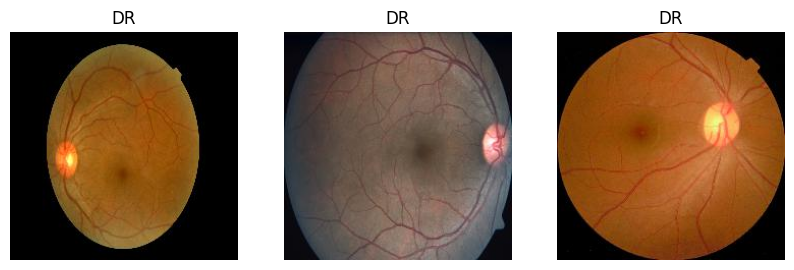

In [ ]:
# Identify the class label for DR
DR_label = 1

# Filter images belonging to the DR class
DR_indices = np.where(y_train == DR_label)[0]

plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[DR_indices[i]])
  plt.title("DR")
  plt.axis("off")

plt.show()


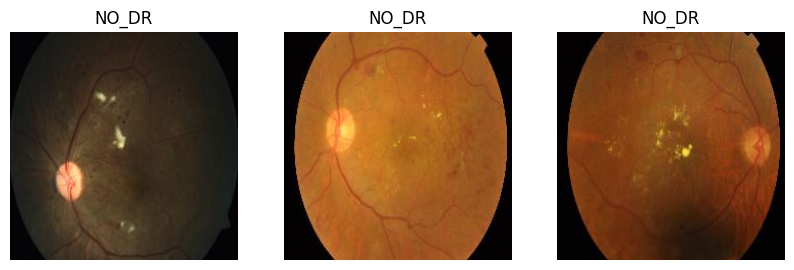

In [ ]:
# Identify the class label for NO_DR
NO_DR_label = 0

# Filter images belonging to the NO_DR class
NO_DR_indices = np.where(y_train == NO_DR_label)[0]


plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[NO_DR_indices[i]])
  plt.title("NO_DR")
  plt.axis("off")
plt.show()


In [ ]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(10)
])



In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/10
52/52 [==============================] - 473s 9s/step - loss: 0.4177 - accuracy: 0.8325 - val_loss: 0.2761 - val_accuracy: 0.8990
Epoch 2/10
52/52 [==============================] - 465s 9s/step - loss: 0.2228 - accuracy: 0.9151 - val_loss: 0.2373 - val_accuracy: 0.8990
Epoch 3/10
52/52 [==============================] - 468s 9s/step - loss: 0.2053 - accuracy: 0.9145 - val_loss: 0.2208 - val_accuracy: 0.9183
Epoch 4/10
52/52 [==============================] - 473s 9s/step - loss: 0.1972 - accuracy: 0.9223 - val_loss: 0.2147 - val_accuracy: 0.9111
Epoch 5/10
52/52 [==============================] - 466s 9s/step - loss: 0.1961 - accuracy: 0.9211 - val_loss: 0.2368 - val_accuracy: 0.9135
Epoch 6/10
52/52 [==============================] - 470s 9s/step - loss: 0.1958 - accuracy: 0.9187 - val_loss: 0.2222 - val_accuracy: 0.9207
Epoch 7/10
52/52 [==============================] - 470s 9s/step - loss: 0.1964 - accuracy: 0.9151 - val_loss: 0.2223 - val_accuracy: 0.9135
Epoch 8/10
52

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

13/13 - 31s - loss: 0.2254 - accuracy: 0.9135 - 31s/epoch - 2s/step
Test accuracy: 0.9134615659713745


In [ ]:
# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print(f'Train accuracy: {train_acc}')

52/52 - 125s - loss: 0.2006 - accuracy: 0.9175 - 125s/epoch - 2s/step
Train accuracy: 0.91746985912323


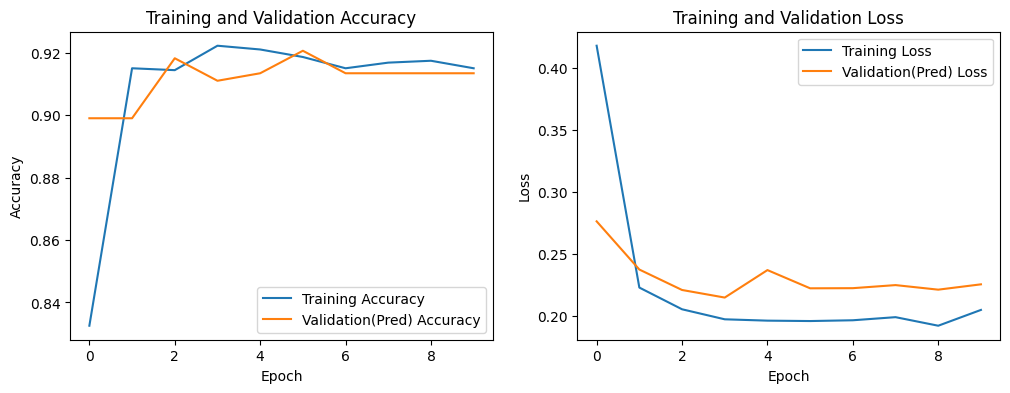

In [ ]:
# Visualize training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation(Pred) Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation(Pred) Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

13/13 [==============================] - 32s 2s/step


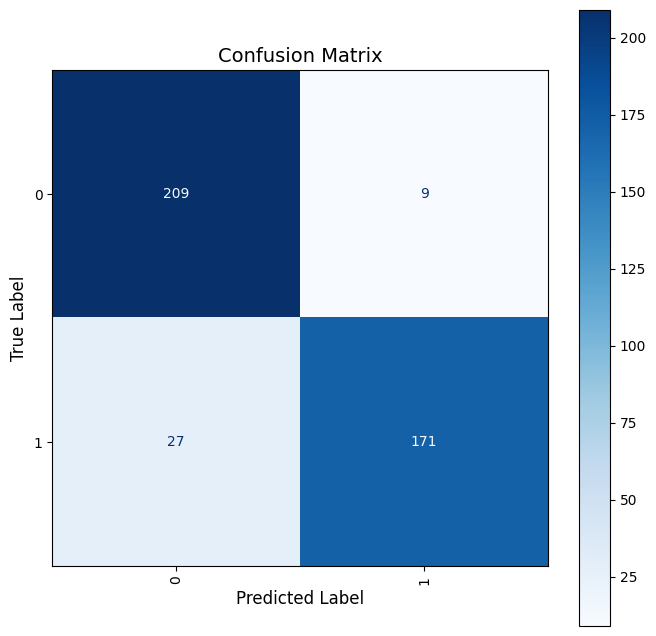

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# the plot size
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), xticks_rotation='vertical')

# font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

plt.show()


## **Overfitting Prevention Technique**





In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10,  # Increase epochs and use early stopping
                    validation_data=(X_train, y_train,),
                    callbacks=[early_stopping])

Epoch 1/10
52/52 [==============================] - 202s 4s/step - loss: 0.7640 - accuracy: 0.7916 - val_loss: 0.4194 - val_accuracy: 0.8771
Epoch 2/10
52/52 [==============================] - 235s 5s/step - loss: 0.3486 - accuracy: 0.9024 - val_loss: 0.2812 - val_accuracy: 0.9235
Epoch 3/10
52/52 [==============================] - 240s 5s/step - loss: 0.2685 - accuracy: 0.9199 - val_loss: 0.2586 - val_accuracy: 0.9163
Epoch 4/10
52/52 [==============================] - 234s 5s/step - loss: 0.2527 - accuracy: 0.9060 - val_loss: 0.2507 - val_accuracy: 0.9120
Epoch 5/10
52/52 [==============================] - 235s 5s/step - loss: 0.2332 - accuracy: 0.9072 - val_loss: 0.2091 - val_accuracy: 0.9169
Epoch 6/10
52/52 [==============================] - 235s 5s/step - loss: 0.2156 - accuracy: 0.9145 - val_loss: 0.2072 - val_accuracy: 0.9259
Epoch 7/10
52/52 [==============================] - 235s 5s/step - loss: 0.2006 - accuracy: 0.9259 - val_loss: 0.1931 - val_accuracy: 0.9337
Epoch 8/10
52

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

print ()

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print(f'Train accuracy: {train_acc}')

13/13 - 12s - loss: 0.2244 - accuracy: 0.9087 - 12s/epoch - 929ms/step
Test accuracy: 0.9086538553237915

52/52 - 45s - loss: 0.1878 - accuracy: 0.9337 - 45s/epoch - 874ms/step
Train accuracy: 0.9337349534034729


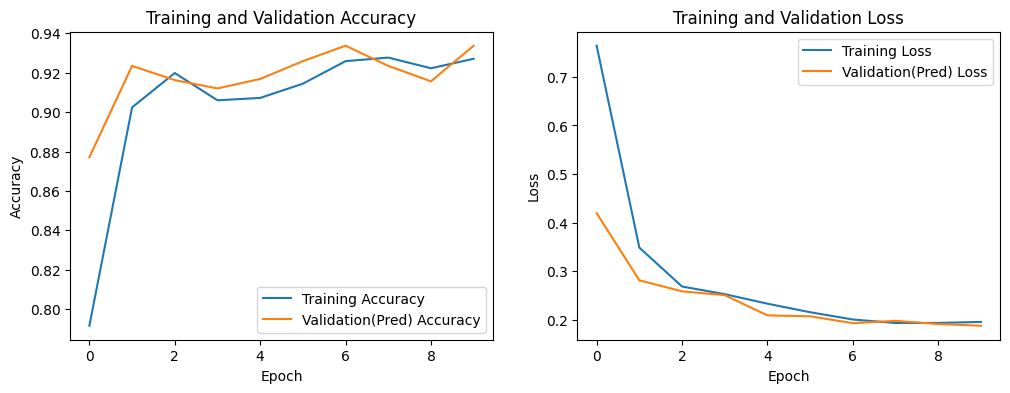

In [ ]:
# Visualize training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation(Pred) Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation(Pred) Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

13/13 [==============================] - 12s 939ms/step


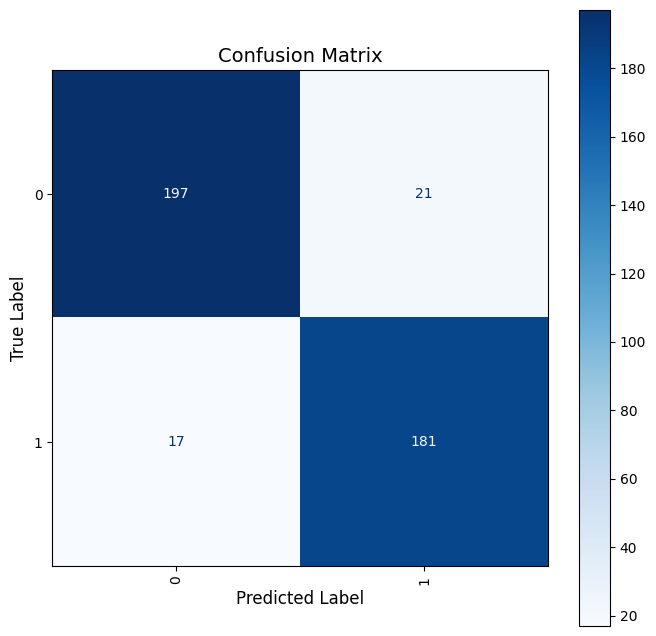

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# the plot size
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), xticks_rotation='vertical')

# font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

plt.show()


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=12,  # Increase epochs and use early stopping
                    validation_data=(X_train, y_train,),
                    callbacks=[early_stopping])

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

print ()

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print(f'Train accuracy: {train_acc}')

13/13 - 16s - loss: 0.2190 - accuracy: 0.9231 - 16s/epoch - 1s/step
Test accuracy: 0.9230769276618958

52/52 - 59s - loss: 0.1549 - accuracy: 0.9440 - 59s/epoch - 1s/step
Train accuracy: 0.9439759254455566


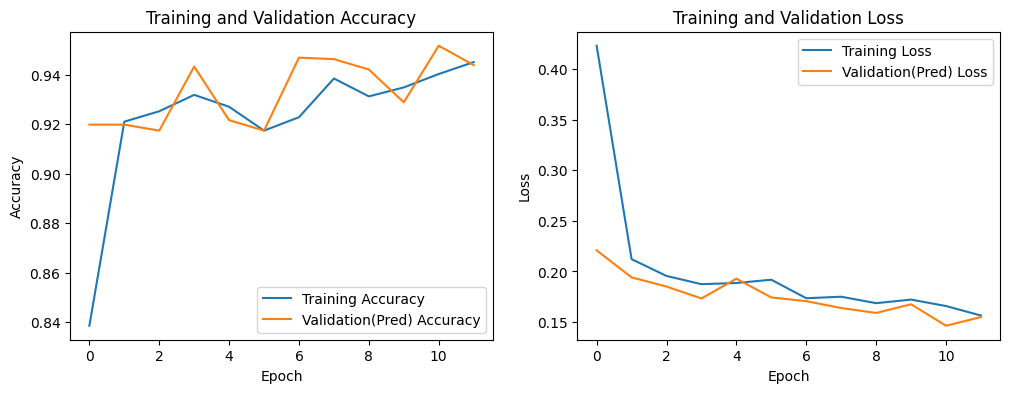

In [ ]:
# Visualize training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation(Pred) Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation(Pred) Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

13/13 [==============================] - 15s 1s/step


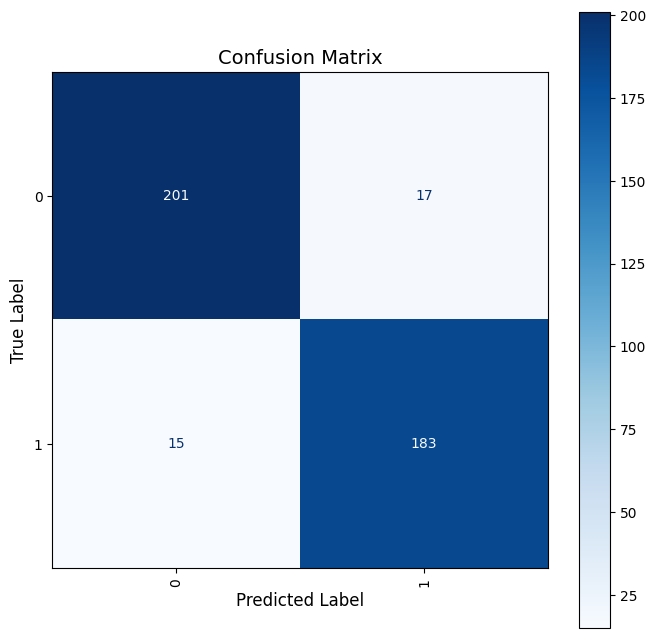

In [ ]:

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# the plot size
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), xticks_rotation='vertical')

# font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

plt.show()


In [ ]:
model.save('my_model.keras')